
<h1><center>Multiple Linear Regression</center></h1>

<h4>À propos de ce bloc-notes</h4>
Dans ce cahier, nous apprenons à utiliser scikit-learn pour implémenter la régression linéaire multiple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons votre modèle à l'aide d'un ensemble de test et enfin utilisons le modèle pour prédire la valeur inconnue.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-11-07 14:45:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Résolution de s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)… 67.228.254.196
Connexion à s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 72629 (71K) [text/csv]
Sauvegarde en : « FuelConsumption.csv »

FuelConsumption.csv 100%[===================>]  70,93K  68,5KB/s    ds 1,0s    

2022-11-07 14:45:13 (68,5 KB/s) — « FuelConsumption.csv » sauvegardé [72629/72629]



__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Lets plot Emission values with respect to Engine size:

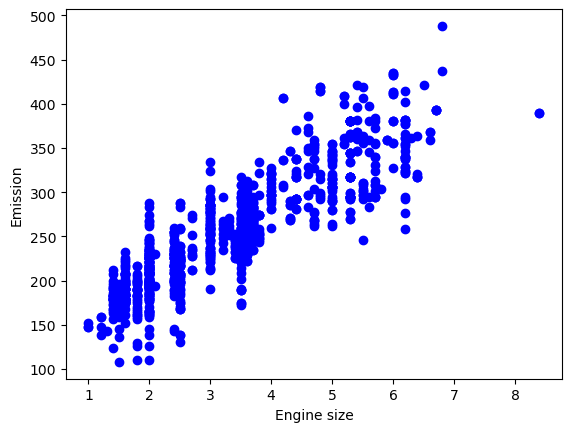

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Création d'un ensemble de données d'entraînement et de test
Train/Test Split consiste à diviser l'ensemble de données en ensembles d'apprentissage et de test, respectivement, qui s'excluent mutuellement. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour former les données. Il est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point de données dans cet ensemble de données, ce qui le rend idéal pour tester ! Et puisque ces données n'ont pas été utilisées pour former le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Donc, en substance, il s'agit vraiment d'un test hors échantillon.



In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

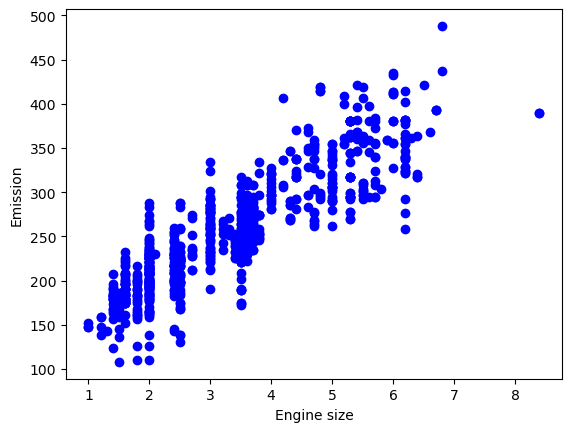

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


En réalité, plusieurs variables prédisent l'émission de Co2. Lorsque plus d'une variable indépendante est présente, le processus est appelé régression linéaire multiple. Par exemple, prédire la co2émission en utilisant FUELCONSUMPTION_COMB, EngineSize et Cylindres de voitures. La bonne chose ici est que la régression linéaire multiple est l'extension du modèle de régression linéaire simple.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.48856151  7.46559952 10.0055431 ]]


Comme mentionné précédemment, __Coefficient__ et __Intercept__ , sont les paramètres de la droite d'ajustement.
Etant donné qu'il s'agit d'une régression linéaire multiple, à 3 paramètres, et sachant que les paramètres sont l'ordonnée à l'origine et les coefficients de l'hyperplan, sklearn peut les estimer à partir de nos données. Scikit-learn utilise la méthode des moindres carrés ordinaires pour résoudre ce problème.

#### Moindres carrés ordinaires (OLS)
OLS est une méthode d'estimation des paramètres inconnus dans un modèle de régression linéaire. OLS choisit les paramètres d'une fonction linéaire d'un ensemble de variables explicatives en minimisant la somme des carrés des différences entre la variable dépendante cible et celles prédites par la fonction linéaire. En d'autres termes, il essaie de minimiser la somme des erreurs quadratiques (SSE) ou de l'erreur quadratique moyenne (MSE) entre la variable cible (y) et notre sortie prédite ($\hat{y}$) sur tous les échantillons de l'ensemble de données.

OLS peut trouver les meilleurs paramètres en utilisant les méthodes suivantes :
    - Résolution analytique des paramètres du modèle à l'aide d'équations de forme fermée
    - Utilisation d'un algorithme d'optimisation (Gradient Descent, Stochastic Gradient Descent, Newton's Method, etc.)

<h2 id="prediction">Prediction</h2>

In [9]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 547.24
Variance score: 0.84


/media/nevermind/D/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [ ]:
# write your code here

